In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [ ]:
cars1 = pd.read_csv('cars1.csv')   # read in the first data file
cars2 = pd.read_csv('cars2.csv') 

In [ ]:
cars1.drop(cars1.columns[9:],axis=1,inplace=True) 

# concatenate the two data
cars = pd.concat([cars1,cars2])
cars.head()  # print the first five rows of the data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


In [ ]:
cars.info()  # print the info of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.1+ KB


In [ ]:
cars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
cars.horsepower = cars.horsepower.str.replace('?','NaN').astype(float)
cars.horsepower.fillna(cars.horsepower.mean(),inplace=True)
cars.horsepower = cars.horsepower.astype(int)

# print the info of the data again to see the datatypes of columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 31.1+ KB


<ipython-input-7-6c974dd06153>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars.horsepower = cars.horsepower.str.replace('?','NaN').astype(float)


In [ ]:
cars = cars.drop('car',axis=1)

# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(cars.duplicated().sum()))
print('sum of null values: {}'.format(cars.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64


In [ ]:
# let's print the summary statistics of the data
display(cars.describe())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.268683,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


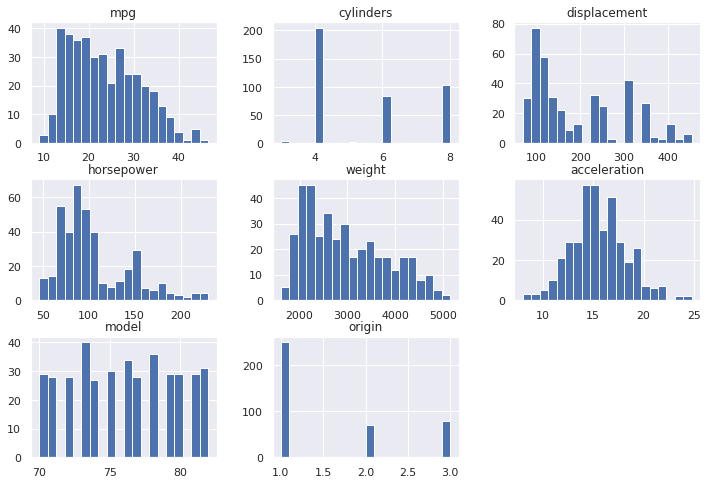

In [ ]:
cars.hist(figsize=(12,8),bins=20)
plt.show()

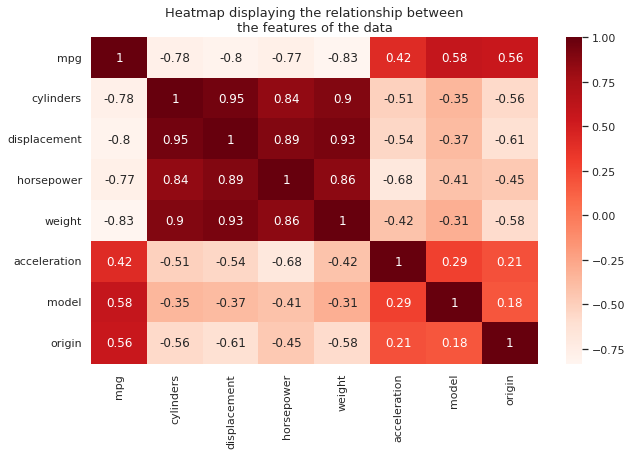

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [ ]:
X1 = sm.tools.add_constant(cars) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

# Let's drop the columns that highly correlate with each other
newcars = cars.drop(['cylinders','displacement','weight'],axis=1)

# Let's do the variance inflation factor method again after doing a feature selection....
#..... to see if there's still multicollinearity.
X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

print('Series before feature selection: \n\n{}\n'.format(series1))
print('Series after feature selection: \n\n{}'.format(series2))

Series before feature selection: 

const           780.806732
mpg               5.583604
cylinders        10.742595
displacement     22.161456
horsepower        9.057010
weight           13.468497
acceleration      2.515892
model             1.954983
origin            1.853451
dtype: float64

Series after feature selection: 

const           715.683761
mpg               3.982206
horsepower        4.131289
acceleration      2.029527
model             1.607080
origin            1.542532
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print('Correlation between mpg and the remaining variables:\n\n{}'.format(newcars.corr().mpg))

Correlation between mpg and the remaining variables:

mpg             1.000000
horsepower     -0.771543
acceleration    0.420289
model           0.579267
origin          0.563450
Name: mpg, dtype: float64


In [ ]:
X = newcars.drop('mpg',axis=1)  # create a DataFrame of feature/independent variables
y = newcars.mpg   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [ ]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7553135661809438

Test score: 0.7271939488775567

Overall model accuracy: 0.7271939488775567

Mean Squared Error: 17.432820262005087


In [ ]:
# let's fit a ridge regression model and see if we can get a higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# score the model to check the accuracy
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.7553135647960986

Test score: 0.7271921092249626

Overall model accuracy: 0.7271921092249626

Mean Squared Error: 17.43293781926926


In [ ]:
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)   # fit the model 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [ ]:
print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))


Best parameter found:
{'alpha': 1}
Train score: 0.7553000451656908

Test score: 0.7269994668801179


In [ ]:
lasso = Lasso()

param['max_iter'] = [1000,10000,100000,1000000]

lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1) # initialize the grid search

lasso_search.fit(X_train,y_train)  # fit the model

# print out the best parameters and score it 
print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 0, 'max_iter': 1000}

Train score: 0.7553135661809438

Test score: 0.7271939488775567


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.026e+03, tolerance: 1.656e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [ ]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2}

Train score: 0.8232095927367749

Test score: 0.7237433560086741

Overall model accuracy: 0.7237433560086741

Mean Squared Error: 16.802494982021614


In [ ]:
forest = RandomForestRegressor()

# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)

forest_search.fit(xtrain,ytrain)  # fit the model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
forest_pred = forest_search.predict(xtest)  # make prediction with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(forest_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,forest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,forest_pred)))

Best parameter found:
{'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 6}

Train score: 0.9042083774536573

Test score: 0.8207367221425061

Overall model accuracy: 0.8207367221425061

Mean Squared Error: 10.903159768913513


In [ ]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(xtrain,ytrain)   # fit the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
gradient_pred = gradient_search.predict(xtest)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))
print('Looks like this model is not too overfitted and it has low mean squared error \
so we use this one........')

Best parameter found:
{'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.05}

Train score: 0.9121540713730315

Test score: 0.8145270752618115

Overall model accuracy: 0.8145270752618115

Mean Squared Error: 11.280843212270893

Looks like this model is not too overfitted and it has low mean squared error so we use this one........


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


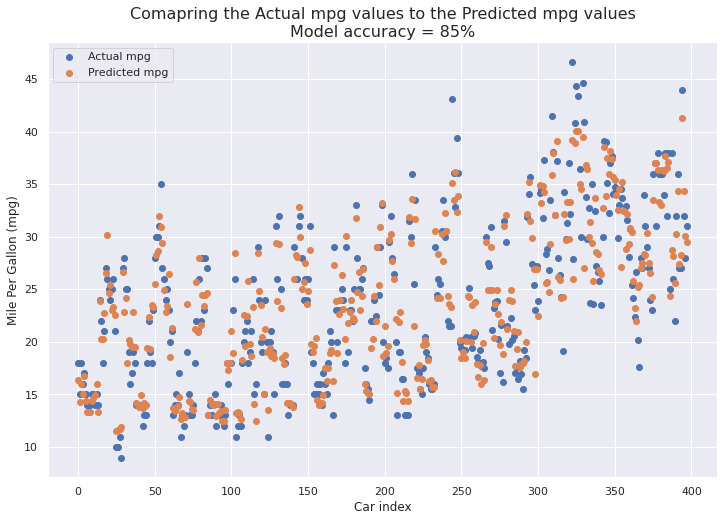

In [ ]:
newcars_new = newcars.drop('mpg',axis=1)  # create a new DataFrame of the feature variables

# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':newcars.mpg.values,
                    'Predicted mpg':gradient_search.predict(newcars_new.values)})


# make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 85%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

"""We can see from the above scatter plot that our model made a good predictions
   as the values of the actual mpg and the predicted mpg are very close to each
   other.
   We can confidently say that we have succeeded in training a model that predicts 
   the Mileage Per Gallon (mpg) of a car given the acceleration,model,origin and 
   the horsepower of a car."""